In [3]:
import pandas as pd
import matplotlib
import mplfinance as mpf
import numpy as np
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


In [20]:
df = pd.read_csv('3034tec.csv', parse_dates=True, index_col=1) #讀取目標股票csv檔的位置

C:\Users\USER\AppData\Local\Temp\ipykernel_6712\2896403378.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('3034tec.csv', parse_dates=True, index_col=1) #讀取目標股票csv檔的位置


In [4]:
# 測試backtesting回測功能
class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(GOOG, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Users\USER\anaconda3\envs\web_scraping\lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1309', ...)

In [21]:
#日期跑掉，重設索引
df = df.reset_index()                              

df.set_index('date', inplace=True)

In [22]:
df

,open,high,low,close,spread,volume,spy_sma_5,spy_sma_10,spy_sma_20,spy_sma_60,...,d,rsi,EMA_Fast,EMA_Slow,DIF,MACD,SMA,BB_20dstd_up,BB_20dstd_down,BB_width
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,118.5,121.0,117.0,120.0,+2.50,1630,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,122.0,123.0,121.0,121.0,+1.00,1733,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,121.5,121.5,118.5,119.5,-1.50,1455,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,118.5,119.0,116.5,116.5,-3.00,1138,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,116.5,116.5,114.5,116.5,0.00,1459,118.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,438.5,440.0,431.0,431.5,-9.00,4844,432.5,431.95,435.950,415.233333,...,52.254976,52.246389,431.356340,426.869917,4.486423,5.519182,435.950,455.012791,416.887209,38.125582
2023-10-11,433.0,440.5,433.0,437.0,+5.50,4386,434.3,431.90,436.425,415.866667,...,62.527026,55.497655,431.609211,427.323997,4.285214,5.272388,436.425,455.091213,417.758787,37.332426
2023-10-12,439.5,439.5,429.0,432.0,-5.00,3645,434.5,431.10,436.600,416.250000,...,63.228392,52.029579,432.823178,428.225923,4.597255,5.137362,436.600,455.029867,418.170133,36.859734


# spy_sma

In [23]:
# 五日線補值
df['spy_sma_5'].fillna(value=np.nan, inplace=True)

df['spy_sma_5'] = df['close'].rolling(window=5, min_periods=1).mean()

In [24]:
# 十日線補值
df['spy_sma_10'].fillna(value=np.nan, inplace=True)

df['spy_sma_10'] = df['close'].rolling(window=10, min_periods=1).mean()

In [25]:
# 二十日線補值
df['spy_sma_20'].fillna(value=np.nan, inplace=True)

df['spy_sma_20'] = df['close'].rolling(window=20, min_periods=1).mean()

In [26]:
# 六十日線補值
df['spy_sma_60'].fillna(value=np.nan, inplace=True)

df['spy_sma_60'] = df['close'].rolling(window=60, min_periods=1).mean()

In [27]:
n = 5  # 以5日WMA為例

# 初始化一個空的Series來存儲WMA線
wma_series = pd.Series(index=df.index)

# 計算WMA
for i in range(n, len(df)):
    weights = range(1, n + 1)
    wma = sum(df['close'].iloc[i-n:i] * weights) / sum(weights)
    wma_series[i] = wma

# 將WMA線添加到DataFrame中
df['wma_5'] = wma_series

df['wma_5'].fillna(method='bfill', inplace=True)

# wma五日線補值
df['wma_5'].fillna(value=np.nan, inplace=True)

df['wma_5'] = df['close'].rolling(window=5, min_periods=1).mean()

In [17]:
df['wma_5'].head(30)

date
2013/1/2      99.933333
2013/1/3      99.933333
2013/1/4      99.933333
2013/1/7      99.933333
2013/1/8      99.933333
2013/1/9      99.933333
2013/1/10     99.933333
2013/1/11    100.200000
2013/1/14    100.466667
2013/1/15    101.066667
2013/1/16    100.866667
2013/1/17    100.266667
2013/1/18     99.733333
2013/1/21    100.000000
2013/1/22     99.933333
2013/1/23    100.333333
2013/1/24    100.666667
2013/1/25    100.200000
2013/1/28     99.733333
2013/1/29     99.400000
2013/1/30     99.800000
2013/1/31    100.200000
2013/2/1     100.600000
2013/2/4     100.866667
2013/2/5     101.666667
2013/2/6     102.200000
2013/2/18    103.266667
2013/2/19    104.733333
2013/2/20    105.800000
2013/2/21    107.133333
Name: wma_5, dtype: float64

In [32]:
'''
RSV = (今日收盤價 - N日內最低價) / (N日內最高價 - N日內最低價) * 100%
K = (RSV + 前一日K * (N-1)) / N
D = (K + 前一日D * (N-1)) / N
'''
# KD補值
for i in range(1, 60):
    # NaN的索引
    nan_indices = df[df['k'].isna()].index

    for index in nan_indices:
        if i == 1:
            df.at[index, 'k'] = df.at[index, 50]
        else:
            RSV = df.at[index - 1, 'spy_sma_60'] * (i - 1)
            df.at[index, 'spy_sma_60'] = (df.at[index, 'close'] + previous_spy_sma_60) / i



,open,high,low,close,spread,volume,spy_sma_5,spy_sma_10,spy_sma_20,spy_sma_60,...,d,rsi,EMA_Fast,EMA_Slow,DIF,MACD,SMA,BB_20dstd_up,BB_20dstd_down,BB_width
date,,,,,,,,,,,,,,,,,,,,,
2013/1/2,97,99,97,99,2.6,14353,99.0,99.0,99.00,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/3,100,102,100,101,1.4,12616,101.0,101.0,101.00,101.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/4,100,101,100,101,0.5,10276,101.0,101.0,101.00,101.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/7,101,101,99,100,-1,9042,100.0,100.0,100.00,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/8,99,100,98,99,-0.8,9463,100.0,99.0,99.00,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/9,100,100,99,100,0.3,7616,100.2,100.0,100.00,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/10,99,101,99,101,1,8304,100.2,101.0,101.00,101.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/11,101,101,100,101,0,7982,100.2,101.0,101.00,101.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/14,101,102,100,102,1,6414,100.6,102.0,102.00,102.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.head(60)

,open,high,low,close,spread,volume,spy_sma_5,spy_sma_10,spy_sma_20,spy_sma_60,...,d,rsi,EMA_Fast,EMA_Slow,DIF,MACD,SMA,BB_20dstd_up,BB_20dstd_down,BB_width
date,,,,,,,,,,,,,,,,,,,,,
2013/1/2,97,99,97,99,2.6,14353,99.000000,99.000000,99.000000,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/3,100,102,100,101,1.4,12616,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/4,100,101,100,101,0.5,10276,100.333333,100.333333,100.333333,100.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/7,101,101,99,100,-1,9042,100.250000,100.250000,100.250000,100.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/8,99,100,98,99,-0.8,9463,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/9,100,100,99,100,0.3,7616,100.200000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/10,99,101,99,101,1,8304,100.200000,100.142857,100.142857,100.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/11,101,101,100,101,0,7982,100.200000,100.250000,100.250000,100.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013/1/14,101,102,100,102,1,6414,100.600000,100.444444,100.444444,100.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


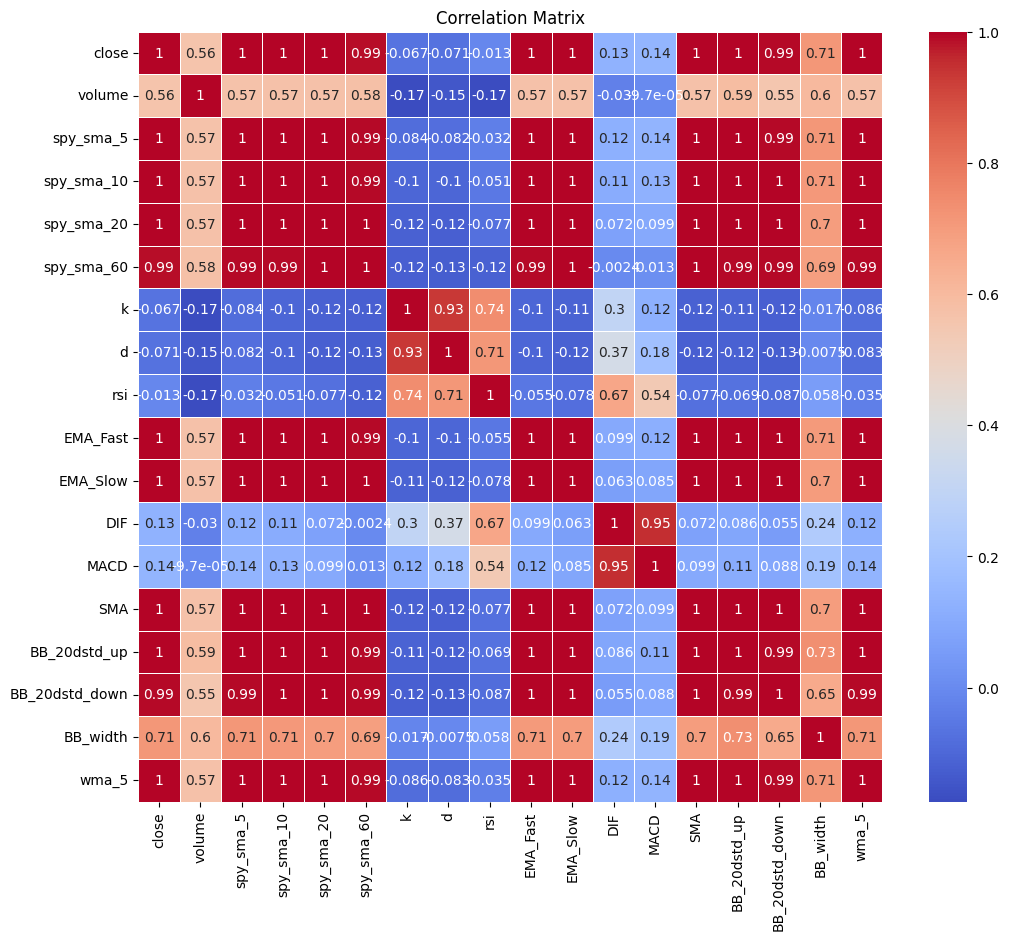

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设df是包含所有这些变量的DataFrame
# 只选择感兴趣的列
interest_columns = ['close', 'volume', 'spy_sma_5', 'spy_sma_10', 'spy_sma_20', 'spy_sma_60',
                    'k', 'd', 'rsi', 'EMA_Fast', 'EMA_Slow', 'DIF', 'MACD', 'SMA',
                    'BB_20dstd_up', 'BB_20dstd_down', 'BB_width', 'wma_5']
correlation_matrix = df[interest_columns].corr()

# 使用seaborn绘制相关性矩阵的热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

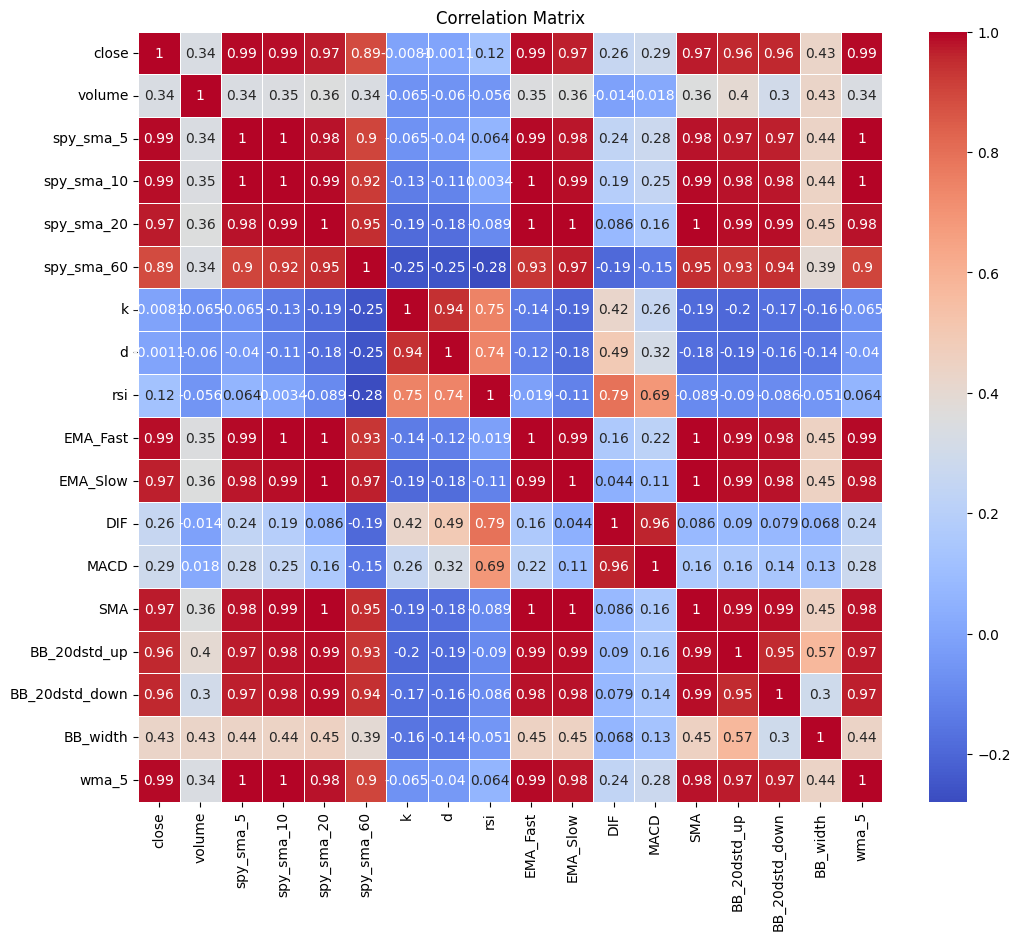

In [29]:
# 假设df是包含所有这些变量的DataFrame
# 只选择感兴趣的列
interest_columns = ['close', 'volume', 'spy_sma_5', 'spy_sma_10', 'spy_sma_20', 'spy_sma_60',
                    'k', 'd', 'rsi', 'EMA_Fast', 'EMA_Slow', 'DIF', 'MACD', 'SMA',
                    'BB_20dstd_up', 'BB_20dstd_down', 'BB_width', 'wma_5']

# 选择时间范围（2020/3/1~2023/12/31）
start_date = '2020-03-01'
end_date = '2023-12-31'
df_filtered = df[(df.index >= start_date) & (df.index <= end_date)][interest_columns]

# 计算相关性矩阵
correlation_matrix = df_filtered.corr()

# 使用seaborn绘制相关性矩阵的热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()